# 18COC102 -  Advanced Artificial Intelligence Systems - Coursework

<hr>
<p style='color:red'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Experiment B3</p>
<hr>


In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -p numpy,torch,torchvision

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
CPython 3.6.7
IPython 7.2.0

numpy 1.15.4
torch 0.4.1
torchvision 0.2.1


In [2]:
# import all dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import os
from tensorboardX import SummaryWriter

In [3]:
#implement the network by myself#

class LeNet(nn.Module):
    
    def __init__(self):
        
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1  = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2  = nn.MaxPool2d(2, 2)
        
        self.fc1   = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.fc2   = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3   = nn.Linear(84, 10)

        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = x.view(-1, 16 * 5 * 5)
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.relu4(x)
        x = self.fc3(x)
        
        return x

In [4]:
# parameters
learning_rate=0.001
batch_size=10000
epoch=800
workers=2

In [5]:
# set GPU 
device = torch.device("cuda:0")
# set Netwrok
net = LeNet()
net = net.to(device)
# set optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
# set loss function
loss = nn.CrossEntropyLoss()

In [6]:
# dataloader refer source [2]

# load training dataset
trainingset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                           transform=transforms.ToTensor())

trainingloader = torch.utils.data.DataLoader(trainingset, batch_size=batch_size,shuffle=True, 
                                             num_workers=workers)
# load testing dataset
testingset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

testingloader = torch.utils.data.DataLoader(testingset, batch_size=batch_size,
                                         shuffle=False, num_workers=workers)

#end of source [2]
#source [2] https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

Files already downloaded and verified
Files already downloaded and verified


In [7]:
#ALL THE CODE IN THIS CELL ARE WRITE BY MY SELF#
# Start training : set net to train model
net.train()

# make two arrays for saving matplotlib data
train_loss = []
train_accu = []
accuracy = 0

# get TersorBoard writer object
writer = SummaryWriter(log_dir='Training')

# Training process
timestart = time.time()
for epoch in range(0,epoch):
    
    # initialize loss,total,correct
    loss_value = 0.0
    total = 0
    correct = 0
    accuracy = 0
    
    # do iteration (total number of training images / batch size) times
    for i, (inputs, labels) in enumerate(trainingloader, 0):
        
        # get the input and its label
        inputs = inputs.to(device)
        labels = labels.to(device)

        # make gradients to 0
        optimizer.zero_grad()

        # forward step
        outputs = net(inputs)
        
        # compute the loss
        l = loss(outputs, labels)
        
        # backward step
        l.backward()
        
        # optimize step
        optimizer.step()

        # compute loss
        loss_value += l.item()
        
        # save to array in oder to output loss image at the end
        train_loss.append(l.item())
        
        # write to tensorboard file
        writer.add_scalars('/GroupB/Loss', {'B3': l.item()}, epoch)

        
        # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()
        accuracy = correct / total * 100.0
        
        # save to array in oder to output accuracy image at the end
        train_accu.append(accuracy)
        
        # write to tensorboard file
        writer.add_scalars('/GroupB/Accuracy', {'B3': accuracy}, epoch)
        

    loss_epoch = loss_value / (500000/batch_size)
    # output the result of this epoch 
    print('[epoch %d]  Loss: %.4f  Accuracy: %.3f %%' %(epoch, loss_epoch , accuracy))

    
# Finish Training
result_training_accuracy = accuracy
result_training_time = (time.time()-timestart)
print('Finished Training! Training process cost %3f sec' %result_training_time)

[epoch 0]  Loss: 0.2303  Accuracy: 10.000 %
[epoch 1]  Loss: 0.2292  Accuracy: 15.544 %
[epoch 2]  Loss: 0.2258  Accuracy: 19.222 %
[epoch 3]  Loss: 0.2175  Accuracy: 21.506 %
[epoch 4]  Loss: 0.2071  Accuracy: 24.416 %
[epoch 5]  Loss: 0.2030  Accuracy: 25.824 %
[epoch 6]  Loss: 0.1995  Accuracy: 26.906 %
[epoch 7]  Loss: 0.1967  Accuracy: 28.052 %
[epoch 8]  Loss: 0.1944  Accuracy: 28.958 %
[epoch 9]  Loss: 0.1924  Accuracy: 30.148 %
[epoch 10]  Loss: 0.1903  Accuracy: 30.890 %
[epoch 11]  Loss: 0.1881  Accuracy: 31.762 %
[epoch 12]  Loss: 0.1860  Accuracy: 32.638 %
[epoch 13]  Loss: 0.1836  Accuracy: 33.588 %
[epoch 14]  Loss: 0.1816  Accuracy: 34.114 %
[epoch 15]  Loss: 0.1789  Accuracy: 35.322 %
[epoch 16]  Loss: 0.1765  Accuracy: 36.092 %
[epoch 17]  Loss: 0.1744  Accuracy: 36.700 %
[epoch 18]  Loss: 0.1722  Accuracy: 37.614 %
[epoch 19]  Loss: 0.1697  Accuracy: 38.426 %
[epoch 20]  Loss: 0.1686  Accuracy: 39.062 %
[epoch 21]  Loss: 0.1666  Accuracy: 39.800 %
[epoch 22]  Loss: 0.

[epoch 181]  Loss: 0.1201  Accuracy: 57.508 %
[epoch 182]  Loss: 0.1204  Accuracy: 57.326 %
[epoch 183]  Loss: 0.1194  Accuracy: 57.706 %
[epoch 184]  Loss: 0.1192  Accuracy: 57.760 %
[epoch 185]  Loss: 0.1193  Accuracy: 57.662 %
[epoch 186]  Loss: 0.1190  Accuracy: 57.784 %
[epoch 187]  Loss: 0.1196  Accuracy: 57.560 %
[epoch 188]  Loss: 0.1197  Accuracy: 57.668 %
[epoch 189]  Loss: 0.1194  Accuracy: 57.684 %
[epoch 190]  Loss: 0.1186  Accuracy: 58.206 %
[epoch 191]  Loss: 0.1185  Accuracy: 58.040 %
[epoch 192]  Loss: 0.1179  Accuracy: 58.274 %
[epoch 193]  Loss: 0.1178  Accuracy: 58.488 %
[epoch 194]  Loss: 0.1181  Accuracy: 58.220 %
[epoch 195]  Loss: 0.1173  Accuracy: 58.520 %
[epoch 196]  Loss: 0.1171  Accuracy: 58.712 %
[epoch 197]  Loss: 0.1170  Accuracy: 58.672 %
[epoch 198]  Loss: 0.1172  Accuracy: 58.624 %
[epoch 199]  Loss: 0.1181  Accuracy: 58.298 %
[epoch 200]  Loss: 0.1184  Accuracy: 58.078 %
[epoch 201]  Loss: 0.1172  Accuracy: 58.530 %
[epoch 202]  Loss: 0.1166  Accurac

[epoch 360]  Loss: 0.1045  Accuracy: 63.546 %
[epoch 361]  Loss: 0.1044  Accuracy: 63.550 %
[epoch 362]  Loss: 0.1043  Accuracy: 63.668 %
[epoch 363]  Loss: 0.1040  Accuracy: 63.706 %
[epoch 364]  Loss: 0.1043  Accuracy: 63.672 %
[epoch 365]  Loss: 0.1037  Accuracy: 63.788 %
[epoch 366]  Loss: 0.1039  Accuracy: 63.854 %
[epoch 367]  Loss: 0.1051  Accuracy: 63.330 %
[epoch 368]  Loss: 0.1047  Accuracy: 63.532 %
[epoch 369]  Loss: 0.1052  Accuracy: 63.156 %
[epoch 370]  Loss: 0.1053  Accuracy: 63.418 %
[epoch 371]  Loss: 0.1051  Accuracy: 63.130 %
[epoch 372]  Loss: 0.1046  Accuracy: 63.406 %
[epoch 373]  Loss: 0.1039  Accuracy: 63.678 %
[epoch 374]  Loss: 0.1036  Accuracy: 63.872 %
[epoch 375]  Loss: 0.1035  Accuracy: 63.968 %
[epoch 376]  Loss: 0.1036  Accuracy: 63.848 %
[epoch 377]  Loss: 0.1041  Accuracy: 63.706 %
[epoch 378]  Loss: 0.1048  Accuracy: 63.320 %
[epoch 379]  Loss: 0.1053  Accuracy: 63.132 %
[epoch 380]  Loss: 0.1047  Accuracy: 63.380 %
[epoch 381]  Loss: 0.1038  Accurac

[epoch 539]  Loss: 0.0959  Accuracy: 66.686 %
[epoch 540]  Loss: 0.0957  Accuracy: 66.586 %
[epoch 541]  Loss: 0.0952  Accuracy: 66.898 %
[epoch 542]  Loss: 0.0947  Accuracy: 67.164 %
[epoch 543]  Loss: 0.0949  Accuracy: 67.088 %
[epoch 544]  Loss: 0.0950  Accuracy: 67.044 %
[epoch 545]  Loss: 0.0946  Accuracy: 67.196 %
[epoch 546]  Loss: 0.0951  Accuracy: 67.098 %
[epoch 547]  Loss: 0.0946  Accuracy: 67.300 %
[epoch 548]  Loss: 0.0943  Accuracy: 67.254 %
[epoch 549]  Loss: 0.0944  Accuracy: 67.332 %
[epoch 550]  Loss: 0.0946  Accuracy: 67.142 %
[epoch 551]  Loss: 0.0947  Accuracy: 67.120 %
[epoch 552]  Loss: 0.0943  Accuracy: 67.214 %
[epoch 553]  Loss: 0.0942  Accuracy: 67.250 %
[epoch 554]  Loss: 0.0942  Accuracy: 67.324 %
[epoch 555]  Loss: 0.0948  Accuracy: 67.162 %
[epoch 556]  Loss: 0.0954  Accuracy: 66.894 %
[epoch 557]  Loss: 0.0949  Accuracy: 67.038 %
[epoch 558]  Loss: 0.0953  Accuracy: 66.762 %
[epoch 559]  Loss: 0.0953  Accuracy: 66.832 %
[epoch 560]  Loss: 0.0953  Accurac

[epoch 718]  Loss: 0.0882  Accuracy: 69.254 %
[epoch 719]  Loss: 0.0883  Accuracy: 69.232 %
[epoch 720]  Loss: 0.0880  Accuracy: 69.498 %
[epoch 721]  Loss: 0.0877  Accuracy: 69.608 %
[epoch 722]  Loss: 0.0877  Accuracy: 69.594 %
[epoch 723]  Loss: 0.0874  Accuracy: 69.718 %
[epoch 724]  Loss: 0.0879  Accuracy: 69.424 %
[epoch 725]  Loss: 0.0875  Accuracy: 69.708 %
[epoch 726]  Loss: 0.0876  Accuracy: 69.614 %
[epoch 727]  Loss: 0.0880  Accuracy: 69.558 %
[epoch 728]  Loss: 0.0878  Accuracy: 69.598 %
[epoch 729]  Loss: 0.0879  Accuracy: 69.486 %
[epoch 730]  Loss: 0.0879  Accuracy: 69.428 %
[epoch 731]  Loss: 0.0874  Accuracy: 69.732 %
[epoch 732]  Loss: 0.0884  Accuracy: 69.150 %
[epoch 733]  Loss: 0.0890  Accuracy: 69.070 %
[epoch 734]  Loss: 0.0894  Accuracy: 68.778 %
[epoch 735]  Loss: 0.0883  Accuracy: 69.360 %
[epoch 736]  Loss: 0.0875  Accuracy: 69.652 %
[epoch 737]  Loss: 0.0869  Accuracy: 69.836 %
[epoch 738]  Loss: 0.0872  Accuracy: 69.644 %
[epoch 739]  Loss: 0.0871  Accurac

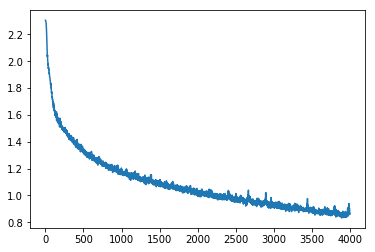

In [8]:
# show the loss
plt.plot(np.arange(len(train_loss)), train_loss)

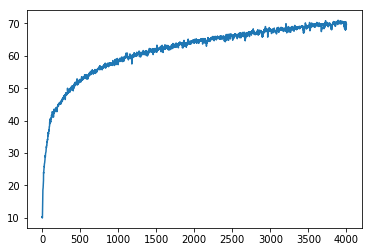

In [9]:
# show the accuracy
plt.plot(np.arange(len(train_accu)), train_accu)

In [10]:
# close the TensorBoard output stream
writer.close()

In [11]:
#ALL THE CODE IN THIS CELL ARE WRITE BY MY SELF#
# Start testing : set net to train model
correct = 0
total = 0

# deactivate the autograd engine
with torch.no_grad():
    
    # do testing iteration
    #for data in testingloader:
        
        # get the input and its label
        #images, labels = data
        #images, labels = images.to(device), labels.to(device)
    for i, (inputs, labels) in enumerate(trainingloader, 0):
        
        # get the input and its label
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # forward step
        outputs = net(inputs)
        
        # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()

# Finish Testing
result_testing_accuracy = correct / total * 100.0
print('The accuracy of the network is %.3f %%' % result_testing_accuracy)

The accuracy of the network is 69.942 %


In [12]:
print('[Configuration]')
print('learning rate = %3f' % learning_rate )
print('batch size = %d' % batch_size )
print('epoch = %d' % epoch )
print('')
print('[Expirement Result]')
print('training time = %3f sec' % result_training_time )
print('training accuracy = %.3f %%' %result_training_accuracy )
print('testing accuracy =  %.3f %%' % (100.0 * correct / total))


[Configuration]
learning rate = 0.001000
batch size = 10000
epoch = 799

[Expirement Result]
training time = 5515.815331 sec
training accuracy = 69.690 %
testing accuracy =  69.942 %


<b>click <a href='../Main.ipynb'>here</a> to return to Main.ipynb